# Using Fred for EDA on time series. 
Video by Rob Mulla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

from fredapi import Fred
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

pd.options.display.max_columns = 500


In [2]:
fred_key = '021698cfb6634a18438f5611edd83ba1' 
# fred_key = 'YOUR_API_KEY_HERE'
fred = Fred(api_key=fred_key)

# Economic Data

In [8]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()
sp500 = fred.get_series(series_id='SP500')
sp500

Text(0.5, 1.0, 'S&P500')

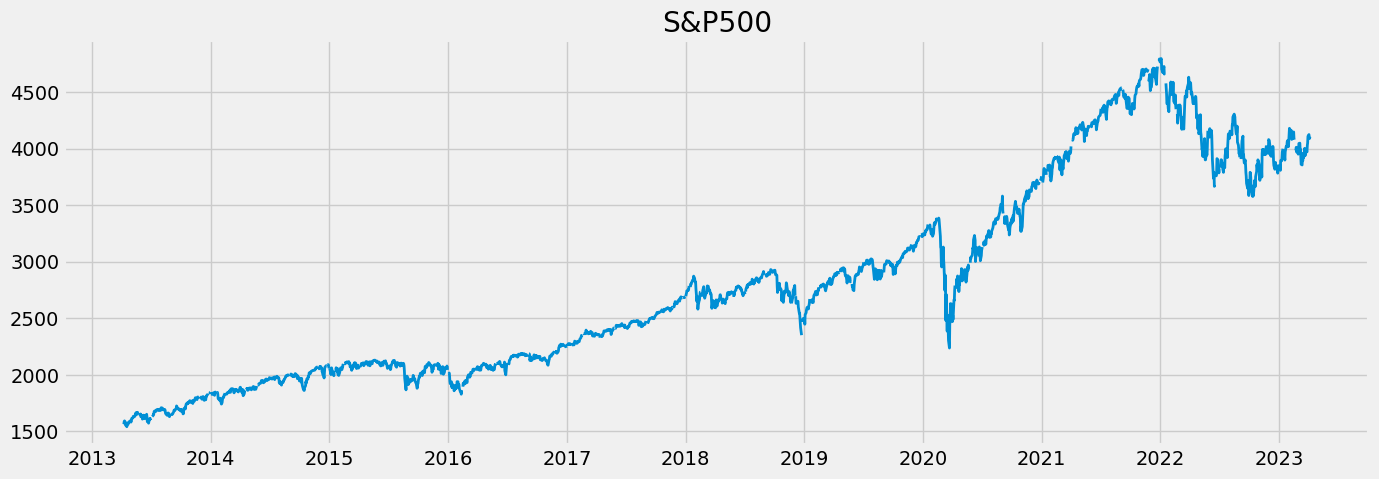

In [42]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(sp500, lw = 2)
ax.set_title('S&P500')

# Pulling and joining Multiple Data Series

In [13]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-08,2023-04-08,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-04-08,2023-04-08,Unemployment Rate - Black or African American,1972-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:12-05:00,68,The series comes from the 'Current Population ...
CAUR,CAUR,2023-04-08,2023-04-08,Unemployment Rate in California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-04-08,2023-04-08,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,55,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-04-08,2023-04-08,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,19,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14200000,LNS14200000,2023-04-08,2023-04-08,Unemployment Rate Part-Time Workers,1968-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:44-05:00,6,The series comes from the 'Current Population ...
LNS14000026,LNS14000026,2023-04-08,2023-04-08,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:54-05:00,6,To obtain estimates of women worker employment...
LNS14024232,LNS14024232,2023-04-08,2023-04-08,"Unemployment Rate - 55 Yrs. & over, Women",1994-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:45:27-05:00,5,None


In [24]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid) # Note the to_frame
    all_results.append(results)
    time.sleep(.5) # to avoid being blocked
unemp_results = pd.concat(all_results, axis = 1)
unemp_results

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000002,FLUR,U2RATE,LNS14000031,NYUR,TXUR,LNS14000024,LNS14000009,LNS14027662,LNS14027660,LNS14000001,LNS14000003,PAUR,ILUR,OHUR,NCUR,LRUN64TTUSM156S,ALUR,MIUR,MNUR,COUR,NJUR,LNS14032183,TNUR,MAUR,WIUR,VAUR,KYUR,GAUR,WAUR,WVUR,LNS14027659,MOUR,INUR,NMUR,AKUR,IAUR,SCUR,AZUR,ARUR,ORUR,OKUR,UTUR,NVUR,LNS14000018,NDUR,MDUR,LNS14000032,LASMT261982000000003,LNS14000012,LAUR,NEUR,KSUR,LNS14024887,CTUR,IDUR,SDUR,PRUR,WYUR,DCUR,MEUR,MTUR,HIUR,RIUR,DEUR,NHUR,LNS14000060,LNS14000028,MSUR,LASMT391746000000003,LNS14000036,VTUR,LRUNTTTTUSM156S,LNS14000029,LNS14027689,CNERUR,CMWRUR,LNS14024230,LRHUTTTTUSM156S,CSOUUR,LNS14000315,LNS14000093,CWSTUR,CNEWUR,LNS14000089,LNS14023705,LRUN24TTUSM156S,LNS14000150,LNS14000091,LNS14100000,LNS14200000,LNS14000026,LNS14024232,LRUN25TTUSM156S,LNS14000025
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,3.6,5.7,4.1,NaN,NaN,3.6,2.7,1.7,5.4,4.1,3.8,3.3,4.0,2.0,3.9,3.7,3.3,4.4,4.6,4.1,3.9,3.653995,2.6,4.4,3.0,2.8,3.3,2.6,3.5,3.7,3.0,3.2,3.9,3.1,4.6,4.1,4.4,2.7,3.2,3.5,3.7,3.1,3.3,4.0,3.5,4.8,3.2,2.4,5.5,16.7,2.1,3.1,5.2,3.7,11.3,3.6,2.7,2.9,8.2,4.0,2.8,2.2,6.0,3.9,4.2,3.1,2.7,3.7,3.3,4.7,2.9,3.2,3.0,4.1,4.5,6.8,3.1,3.6,2.9,3.2,3.9,3.6,2.5,3.6,3.4,2.0,2.7,4.0,3.6,4.1,0.5,8.2,2.0,2.6,3.5,4.4,3.3,2.3,3.2,3.3
2022-12-01,3.5,5.7,4.1,NaN,NaN,3.6,2.7,1.6,5.1,4.1,3.8,3.2,4.1,1.9,3.6,3.4,3.0,4.3,4.6,4.1,3.8,3.506456,2.6,4.3,2.9,2.8,3.3,2.4,3.5,3.7,3.0,3.1,3.9,3.1,4.5,4.1,5.0,2.7,3.1,3.5,3.7,3.0,3.3,4.0,3.4,4.8,3.2,2.4,5.5,17.1,2.1,3.0,5.5,3.7,10.4,3.5,2.7,2.9,8.2,4.0,2.8,2.2,6.

In [25]:
cols_to_drop = []
for i in unemp_results:
    if len(i)>4:
        cols_to_drop.append(i)

unemp_results = unemp_results.drop(columns = cols_to_drop, axis = 1)

In [26]:
unemp_results

,CAUR,FLUR,NYUR,TXUR,PAUR,ILUR,OHUR,NCUR,ALUR,MIUR,MNUR,COUR,NJUR,TNUR,MAUR,WIUR,VAUR,KYUR,GAUR,WAUR,WVUR,MOUR,INUR,NMUR,AKUR,IAUR,SCUR,AZUR,ARUR,ORUR,OKUR,UTUR,NVUR,NDUR,MDUR,LAUR,NEUR,KSUR,CTUR,IDUR,SDUR,PRUR,WYUR,DCUR,MEUR,MTUR,HIUR,RIUR,DEUR,NHUR,MSUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,4.1,2.7,4.1,3.8,4.4,4.6,4.1,3.9,2.6,4.4,3.0,2.8,3.3,3.5,3.7,3.0,3.2,3.9,3.1,4.6,4.1,2.7,3.2,3.5,3.7,3.1,3.3,4.0,3.5,4.8,3.2,2.4,5.5,2.1,3.1,3.6,2.7,2.9,4.0,2.8,2.2,6.0,3.9,4.2,3.1,2.7,3.7,3.3,4.7,2.9,4.1,3.1
2022-12-01,4.1,2.7,4.1,3.8,4.3,4.6,4.1,3.8,2.6,4.3,2.9,2.8,3.3,3.5,3.7,3.0,3.1,3.9,3.1,4.5,4.1,2.7,3.1,3.5,3.7,3.0,3.3,4.0,3.4,4.8,3.2,2.4,5.5,2.1,3.0,3.5,2.7,2.9,4.0,2.8,2.2,6.0,3.9,4.2,3.1,2.6,3.7,3.2,4.6,2.9,4.0,3.0
2023-01-01,4.2,2.6,4.2,3.9,4.3,4.5,4.0,3.8,2.6,4.3,2.9,2.8,3.4,3.5,3.5,2.9,3.2,3.9,3.1,4.6,3.9,2.7,3.1,3.5,3.8,3.0,3.2,3.8,3.4,4.8,3.1,2.4,5.5,2.1,3.0,3.5,2.5,2.9,3.9,2.7,2.1,6.0,3.9,4.5,2.9,2.5,3.6,3.1,4.6,2.8,3.9,2.9
2023-02-01,4.3,2.6,4.2,4.0,4.4,4.5,3.9,3.6,2.5,4.3,3.0,2.9,3.5,3.5,3.7,2.7,3.2,3.9,3.1,4.6,3.7,2.6,3.1,3.6,3.8,2.9,3.2,3.7,3.2,4.7,3.0,2.4,5.5,2.1,2.9,3.6,2.3,2.9,4.0,2.6,2.1,6.0,3.8,4.7,2.8,2.4,3.6,3.1,4.6,2.7,3.7,2.8


In [27]:
unemp_states = unemp_results.copy()
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns =[id_to_state[c] for c in unemp_states.columns] # map your dictionary to every column using list comprehensions


In [28]:
px.line(unemp_states)

# April 2020 Unemployment Rate per State

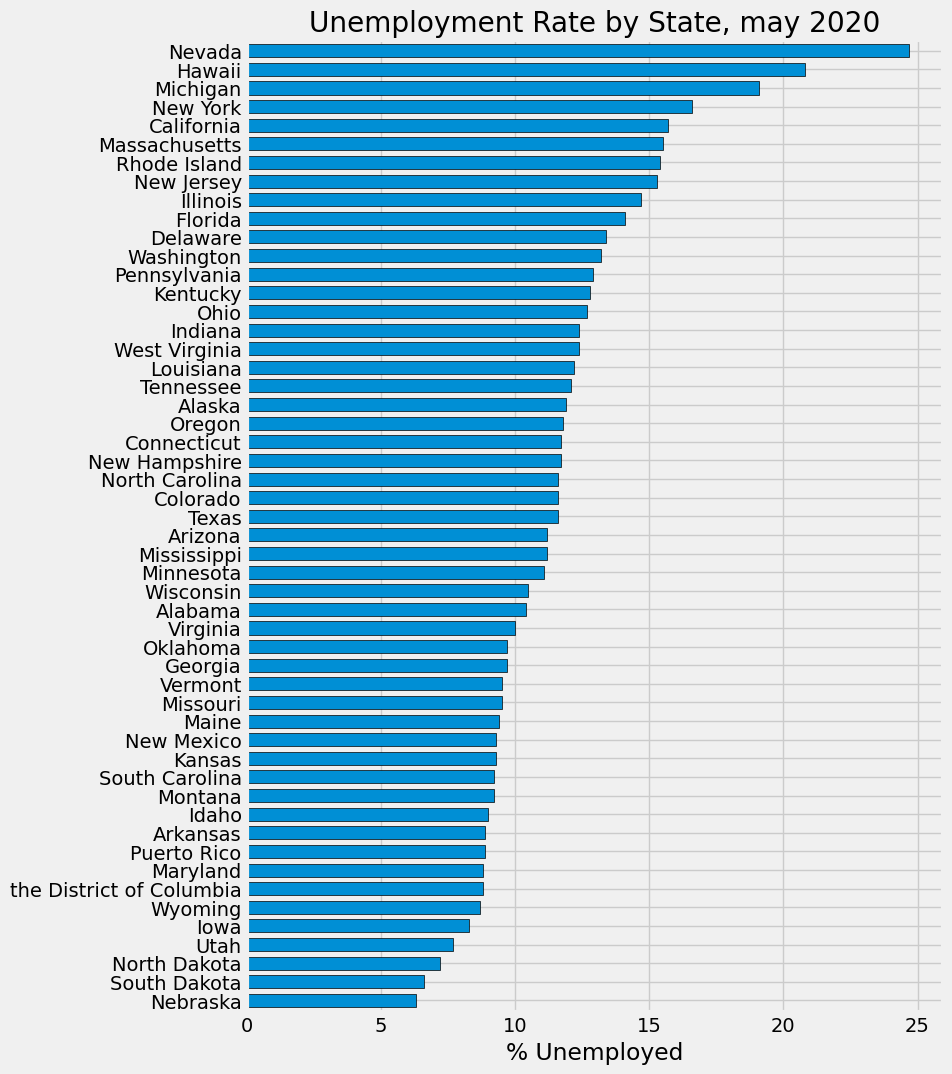

In [35]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind = 'barh', figsize = (8,12), width = 0.7, edgecolor = 'black',
          title = 'Unemployment Rate by State, May 2020')

ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate
People who are in the workforce

In [7]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [9]:
part_df.shape

(109, 15)

In [8]:
part_df['title']

series id
CIVPART                               Labor Force Participation Rate
LNS11300060              Labor Force Participation Rate - 25-54 Yrs.
LNS11300002                   Labor Force Participation Rate - Women
LNS11300001                     Labor Force Participation Rate - Men
LNS11324230          Labor Force Participation Rate - 55 Yrs. & over
                                         ...                        
LRIN24TTUSM156S    Inactivity Rate: Aged 15-24: All Persons for t...
LRACTTFEUSM156S    Activity Rate: Aged 15 and Over: Females for t...
LRACTTMAUSM156S    Activity Rate: Aged 15 and Over: Males for the...
LRINTTMAUSM156S    Inactivity Rate: Aged 15 and Over: Males for t...
LRINTTFEUSM156S    Inactivity Rate: Aged 15 and Over: Females for...
Name: title, Length: 109, dtype: object

In [19]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.2) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment Vs Participation for each state for 2020 and 2021
We will start wit one state

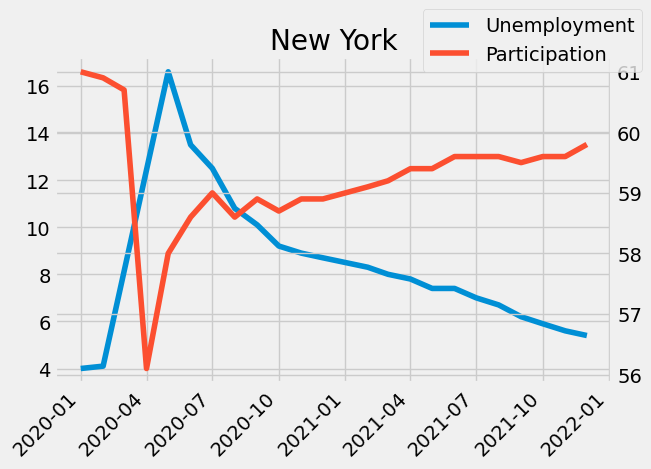

In [80]:
fig, ax = plt.subplots(sharex=True)
ax2 = ax.twinx()
# .plot(ax = ax, label = 'Unemployment')
# .plot(ax = ax2, label = 'Participation', color = color_pal[1])

ax.plot(unemp_states.query('index >= 2020 and index<2022')['New York'])
ax2.plot(part_states.query('index >= 2020 and index<2022')['New York'],color = color_pal[1])
ax.set_title("New York")
fig.autofmt_xdate(rotation=45)
fig.legend(['Unemployment','Participation'])
ax2.grid = False


In [73]:
unemp_states.index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', length=564, freq=None)

In [65]:
# Fix DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

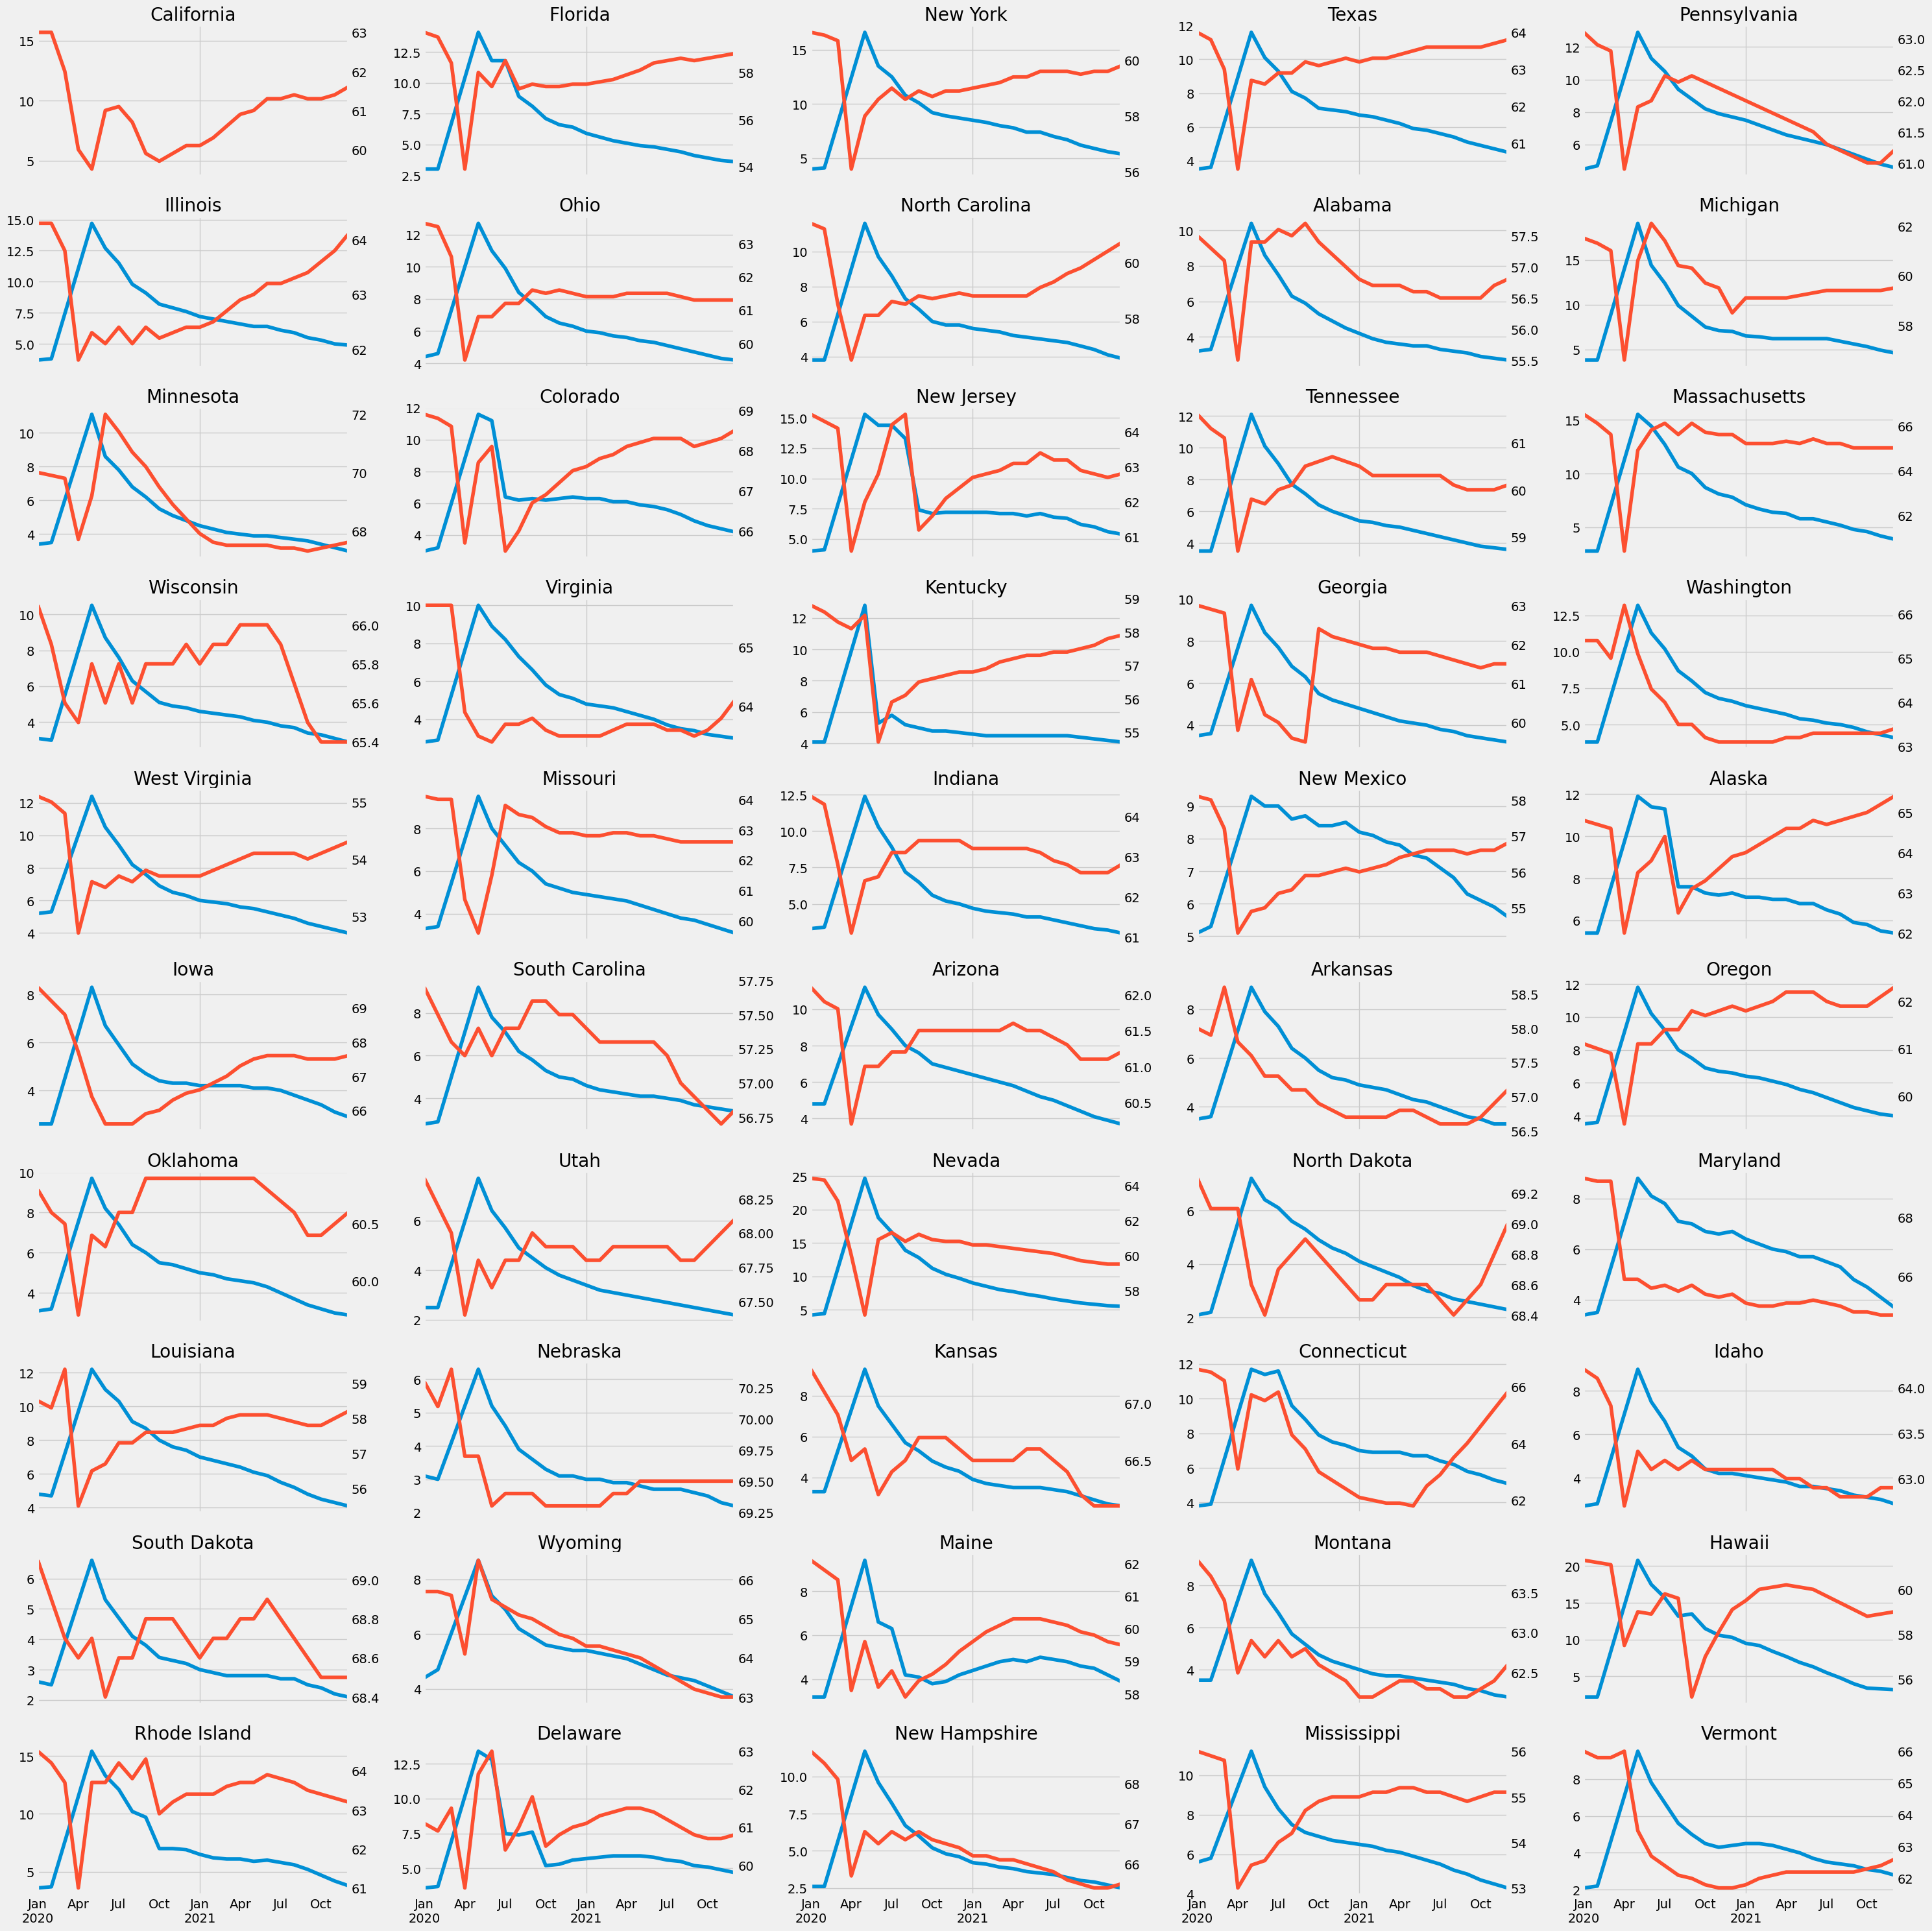

In [66]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten() # do not forget to flatten. 

i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

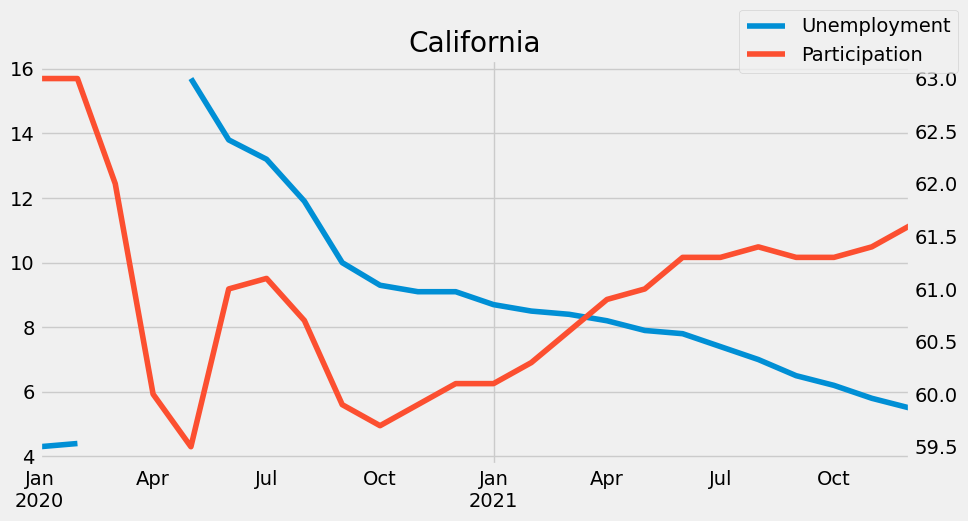

In [82]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()